In [12]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## Loading images

In [13]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to 256x256
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
])

In [14]:
dataset = datasets.ImageFolder(root='data/dataset-resized', transform=transform)

In [15]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

## Images visualization

In [16]:
def show_images(images, labels, class_names):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 10))
    for i, (img, label) in enumerate(zip(images, labels)):
        img = img.numpy().transpose((1, 2, 0))  # Convert from Tensor to NumPy and reshape for plotting
        img = np.clip(img, 0, 1)  # Clip values to the range [0, 1] for valid image display
        axes[i].imshow(img)
        axes[i].set_title(class_names[label])
        axes[i].axis('off')
    plt.show()

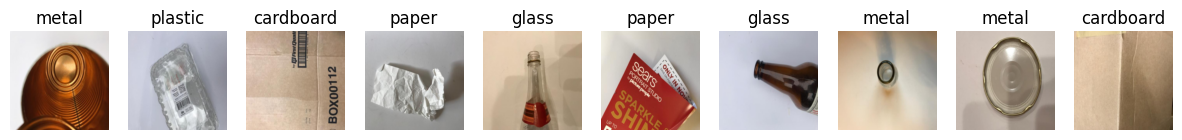

In [17]:
# Get the class names from the dataset
class_names = dataset.classes

# Randomly select a batch from the dataloader
images, labels = next(iter(dataloader))

# Randomly select 5 images from the batch
indices = torch.randperm(images.size(0))[:10]
selected_images = [images[i] for i in indices]
selected_labels = [labels[i].item() for i in indices]

# Display the selected images
show_images(selected_images, selected_labels, class_names)